<a href="https://colab.research.google.com/github/pedrohenriquecordeiro/notebook_learning_pandas/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
import pandas as pd
aluguel = pd.read_csv('/content/drive/My Drive/data/aluguel.csv',delimiter=';')
aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [66]:
aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
Tipo          32960 non-null object
Bairro        32960 non-null object
Quartos       32960 non-null int64
Vagas         32960 non-null int64
Suites        32960 non-null int64
Area          32960 non-null int64
Valor         32943 non-null float64
Condominio    28867 non-null float64
IPTU          22723 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [67]:
# funciona apenas para Series
aluguel.Tipo.value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

Selecionando colunas

In [68]:
aluguel[['Tipo','Bairro']][:5]

,Tipo,Bairro
0,Quitinete,Copacabana
1,Casa,Jardim Botânico
2,Conjunto Comercial/Sala,Barra da Tijuca
3,Apartamento,Centro
4,Apartamento,Higienópolis


Series : dataframe com uma coluna

Um dataframe é um conjunto de Series

In [69]:
serie = aluguel['Tipo']
type(serie)

pandas.core.series.Series

Deleta os valores duplicados

In [70]:
serie = serie.drop_duplicates(inplace = False)
serie

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

Cria um dataframe a partir da serie

In [71]:
tipo_de_imovel = pd.DataFrame(serie)
tipo_de_imovel.head()

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio


Reseta o indice

In [72]:
tipo_de_imovel.index = range(tipo_de_imovel.shape[0])
tipo_de_imovel.head()

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio


### Seleciona apenas os moveis residenciais

Lista os tipos

In [73]:
tipos = list(aluguel['Tipo'].drop_duplicates(inplace = False))
tipos

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

Mantem apenas os tipos residenciais

In [74]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat']


 ## verificamos dentro do DataFrame se os elementos da nossa lista existem de fato, assinalando True ou False

selecao = aluguel.isin(residencial)
selecao = selecao['Tipo']
selecao[:5]

0     True
1     True
2    False
3     True
4     True
Name: Tipo, dtype: bool

Usaremos um método de seleção no DataFrame, de maneira que só tenhamos os registros que possuem a marcação True.

In [75]:
aluguel_residencial = aluguel[selecao]
aluguel_residencial.head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


### Consultas

In [76]:
#Selecione somente os imóveis classificados com tipo 'Apartamento'.
selecao = aluguel['Tipo'] == 'Apartamento'
n1 = aluguel[selecao]
n1.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [77]:
#Selecione os imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'.
selecao = (aluguel['Tipo'] == 'Casa') | (aluguel['Tipo'] == 'Casa de Condomínio') | (aluguel['Tipo'] == 'Casa de Vila')
n2 = aluguel[selecao]
n2.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
18,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
22,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN


In [78]:
#Selecione os imóveis com área entre 60 e 100 metros quadrados, incluindo os limites.
#60 <= Area <=100
selecao = (aluguel['Area'] >= 60) & (aluguel['Area'] <= 100)
n3 = aluguel[selecao]
n3.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [79]:
#Selecione os imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00.
selecao = (aluguel['Quartos'] >= 4) & (aluguel['Valor'] < 2000)
n4 = aluguel[selecao]
n4.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
701,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1465,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2874,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
3075,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
3218,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0


### Limpando o dataset de dados vazios

In [80]:
# eliminado registros com Valor nulo
aluguel = aluguel.dropna(subset = ['Valor'] , inplace = False)
aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [81]:
# eliminando registros Apartamento com Condominio nulo
selecao = (aluguel['Tipo'] == 'Apartamento') & (aluguel['Condominio'].isnull())
# mantem no dataset os dados com Apartamento com valores de condominio validos
aluguel = aluguel[~selecao]
aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [82]:
# os valores de Casa com Condominio e IPTU nulos preenchemos com 0
aluguel = aluguel.fillna({'Condominio': 0, 'IPTU': 0})
aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0


#### Modificando o dataset

In [83]:
# calculando um valor bruto
aluguel_residencial['Valor Bruto'] = aluguel_residencial['Valor'] + aluguel_residencial['Condominio'] + aluguel_residencial['IPTU']

# criaremos outra variável que armazenará o valor por metro quadrado
aluguel_residencial['Valor m2'] = (aluguel_residencial['Valor']/aluguel_residencial['Area']).round(2)

# cria uma variável para o valor do bruto do metro quadrado
aluguel_residencial['Valor Bruto m2'] = (aluguel_residencial['Valor Bruto']/aluguel_residencial['Area']).round(2)

# criaremos uma variável que represente os tipos de imóveis :  casa e apartamento
# o aplly aplica uma função lambda
aluguel_residencial['Tipo Agregado'] = aluguel_residencial['Tipo'].apply(lambda x: 'Casa' if x in ['Casa', 'Casa de Condomínio', 'Casa de Vila'] else 'Apartamento')
aluguel_residencial.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor m2,Valor Bruto m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,70.00,NaN,Casa
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,NaN,16.67,NaN,Apartamento
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN,NaN,17.14,NaN,Apartamento


### Calcula a média do valor conforme cada bairro

In [84]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = aluguel_residencial['Bairro'].isin(bairros)
aluguel_residencial = aluguel_residencial[selecao].drop_duplicates()
grupo_bairro = aluguel_residencial.groupby('Bairro')


for bairro, data in grupo_bairro: 
    print(bairro)
    print(data.head())
    print('\n\n')
    break


for bairro, data in grupo_bairro: 
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

print('\n')

print(grupo_bairro[['Valor', 'Condominio']].mean().round(2))

print('\n')

print(grupo_bairro.describe().round(2))

Barra da Tijuca
                  Tipo           Bairro  ...  Valor Bruto m2  Tipo Agregado
7   Casa de Condomínio  Barra da Tijuca  ...             NaN           Casa
20         Apartamento  Barra da Tijuca  ...           36.36    Apartamento
22  Casa de Condomínio  Barra da Tijuca  ...             NaN           Casa
30         Apartamento  Barra da Tijuca  ...           35.43    Apartamento
41         Apartamento  Barra da Tijuca  ...           43.36    Apartamento

[5 rows x 13 columns]



Barra da Tijuca -> 8407.451720595789
Botafogo -> 8407.451720595789
Copacabana -> 8407.451720595789
Flamengo -> 8407.451720595789
Ipanema -> 8407.451720595789
Leblon -> 8407.451720595789
Tijuca -> 8407.451720595789


                    Valor  Condominio
Bairro                               
Barra da Tijuca   8407.45     3793.66
Botafogo         11994.41     1010.26
Copacabana        4133.33     1158.47
Flamengo          4266.44     1094.84
Ipanema           9630.44     2308.71
Leblon            87

Mostra em um gráfico


Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

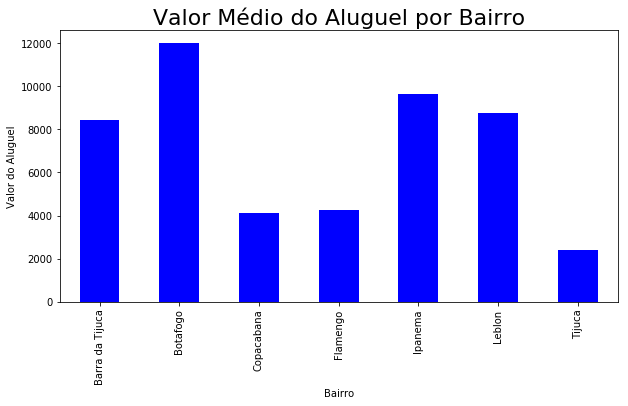

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (10,5))

fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

### Queremos contar a quantidade de imóveis que possuem de 1 a 2 quartos; depois 3 e 4 quartos; 5 e 6 e a faixa final de 7 ou mais quartos.

In [86]:
classes = [0, 2, 4, 6, 100]
quartos = pd.cut(aluguel.Quartos, classes)
pd.value_counts(quartos)

(0, 2]      11855
(2, 4]       9715
(4, 6]        706
(6, 100]       85
Name: Quartos, dtype: int64

### Iremos eliminar todos os outliers (vamos usar todos os bairros agora) 

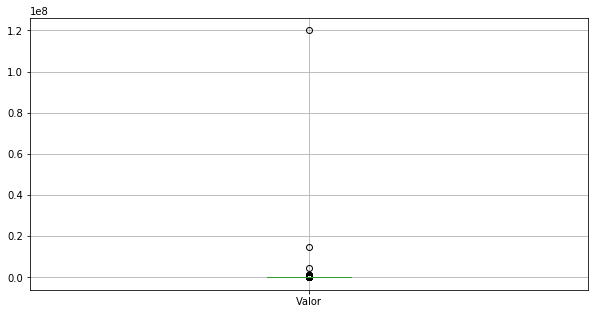

In [87]:
# visualização dos outliers
aluguel.boxplot(['Valor'])

In [88]:
outliers = aluguel[aluguel['Valor'] >= 500000]
outliers[:5]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
826,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,0.0,0.0
884,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1163,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2722,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2994,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f066b61ecc0>]],
      dtype=object)

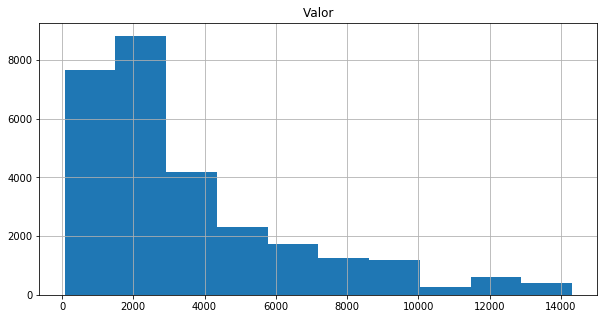

In [89]:
# para eliminar os outliers utilizaremos a técnica do boxplot
valor = aluguel['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

selecao = (valor >= limite_inferior) & (valor <= limite_superior)
aluguel_tratado = aluguel[selecao]
aluguel_tratado.hist(['Valor'])

###  Identificando e Removendo Outliers por Grupo

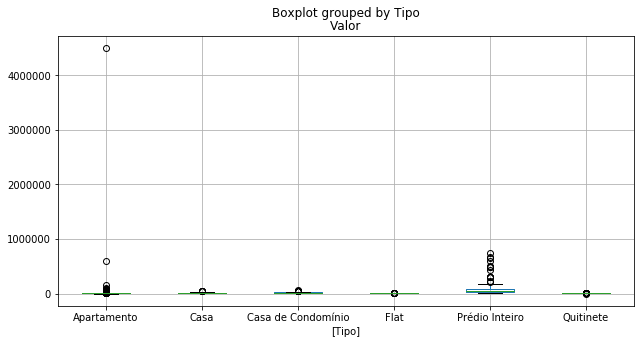

In [90]:
aluguel_residencial.boxplot(['Valor'], by = ['Tipo'])

#### iremos remover os outliers para cada tipo de imovel

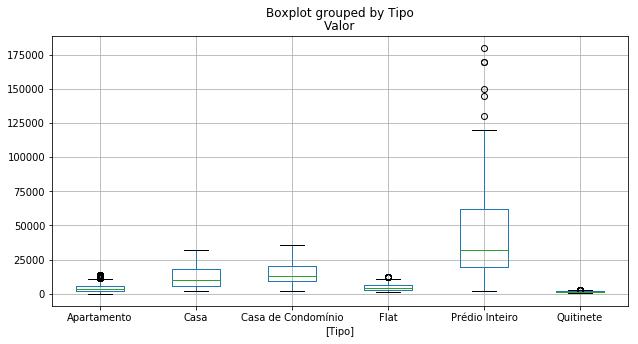

In [91]:
grupo_tipo = aluguel_residencial.groupby('Tipo')['Valor']
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    # seleciona os imoveis com o tipo <tipo>
    _tipo = (aluguel_residencial['Tipo'] == tipo)
    dentro_limite = (aluguel_residencial['Valor'] >= limite_inferior[tipo]) & (aluguel_residencial['Valor'] <= limite_superior[tipo])
    selecao = _tipo & dentro_limite
    dados_selecao = aluguel_residencial[selecao]
    new = pd.concat([new, dados_selecao])

new.boxplot(['Valor'], by = ['Tipo'])

In [0]:
new.to_csv('/aluguel_sem_outliers.csv', sep = ';', index = False)

### Criaremos um gráfico para salvá-lo e usá-lo em outros relatórios

Text(0.5, 1.0, 'Valor Médio por Tipo')

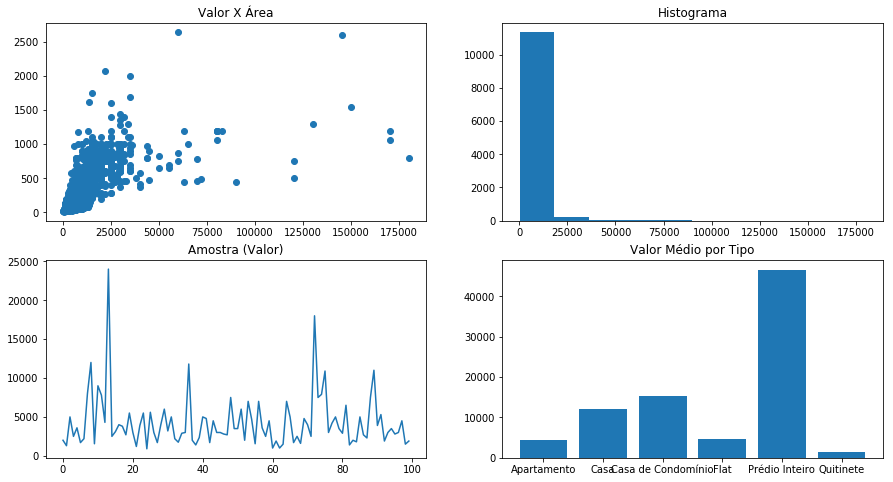

In [95]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

base = plt.figure() 
g1 = base.add_subplot(2, 2, 1)
g2 = base.add_subplot(2, 2, 2)
g3 = base.add_subplot(2, 2, 3)
g4 = base.add_subplot(2, 2, 4)

g1.scatter(new.Valor, new.Area)
g1.set_title('Valor X Área')

g2.hist(new.Valor)
g2.set_title('Histograma')

dados_g3 = new.Valor.sample(100) 
dados_g3.index = range(dados_g3.shape[0])
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

grupo = new.groupby('Tipo')['Valor']
label = grupo.mean().index
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

In [0]:
base.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')